# Классификация Fashion-MNIST

Теперь ваша очередь построить и обучить нейронную сеть. Вы будете использовать [датасет Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist), который является заменой для набора данных MNIST. MNIST на самом деле довольно тривиален для нейронных сетей, где вы можете легко достичь точности выше 97%. Fashion-MNIST — это набор изображений одежды размером 28x28 пикселей в градациях серого. Он более сложен, чем MNIST, поэтому лучше отражает фактические показатели производительности вашей сети и лучше представляет наборы данных, которые вы будете использовать на практике.

<img src='assets/fashion-mnist-sprite.png' width=500px>

В этом блокноте вы построите свою собственную нейронную сеть. В основном вы можете просто скопировать и вставить код из блокнота 3, но важно попробовать написать код самим и заставить его работать, чтобы научиться работать с Pytorch. Тем не менее, не стесняйтесь обращаться к предыдущим блокнотам по мере работы над этим заданием.

В первую очередь давайте загрузим набор данных через torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Определим преобразование для нормализации данных
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Загрузим обучающие данные
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Загрузим тестовые данные
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

c:\Users\user1\anaconda3\envs\YOLO\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\user1\anaconda3\envs\YOLO\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


100%|██████████| 26421880/26421880 [00:01<00:00, 24252205.08it/s]


Extracting C:\Users\user1/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\user1/.pytorch/F_MNIST_data/FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 14793843.52it/s]


Extracting C:\Users\user1/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\user1/.pytorch/F_MNIST_data/FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 10216546.80it/s]


Extracting C:\Users\user1/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\user1/.pytorch/F_MNIST_data/FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5175521.81it/s]

Extracting C:\Users\user1/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\user1/.pytorch/F_MNIST_data/FashionMNIST\raw



Отобразим одно из изображений.

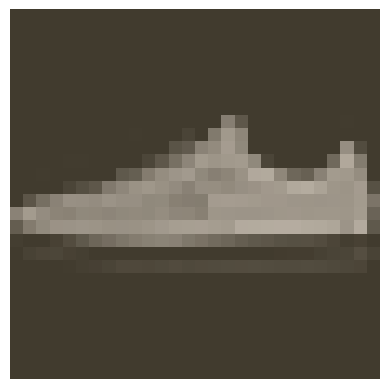

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Построение сети

Здесь вы должны определить вашу сеть. Как и в случае с MNIST, каждое изображение имеет размер 28x28, что составляет в общей сложности 784 пикселя, и существует 10 классов. Вы должны включить в архитектуру сети как минимум один скрытый слой. Рекомендуется использовать активации ReLU для слоев и возвращать логиты (logits) или логарифмическую софтмакс (log-softmax) после прямого прохода. Вам решать, сколько слоев добавить и какого размера будут эти слои.

In [3]:
from torch import nn, optim
import torch.nn.functional as F

In [11]:
# TODO: Определите архитектуру вашей сети
model = nn.Sequential(nn.Linear(784, 196),
                      nn.ReLU(),
                      nn.Linear(196, 92),
                      nn.ReLU(),
                      nn.Linear(92, 48),
                      nn.ReLU(),
                      nn.Linear(48, 10))

# Обучение сети

Теперь вы должны создать свою сеть и обучить ее. Сначала вам нужно определить [фукцию потерь (criterion)](http://pytorch.org/docs/master/nn.html#loss-functions) (что-то вроде `nn.CrossEntropyLoss` или `nn.NLLLoss`) и [оптимизатор (optimizer)](http://pytorch.org/docs/master/optim.html) (обычно `optim.SGD` или `optim.Adam`).

Затем напишите код для обучения. Помните, что шаг обучения — это довольно простой процесс:

* Сделайте прямой проход через сеть, чтобы получить логиты 
* Используйте логиты для вычисления функции потерь
* Выполните обратный проход через сеть с `loss.backward()`, чтобы вычислить градиенты
* Сделайте шаг обновления весов с помощью оптимизатора

Настраивая гиперпараметры (количество слоев, скорость обучения и т.д.), вы должны получить функцию потерь на обучающей выборке ниже 0,4.

In [12]:
# TODO: Создайте сеть, определите функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [13]:
# TODO: Обучите сеть
epochs = 10
history = []
for e in range(epochs):
    total_loss = 0
    for X, y in trainloader:
        X = X.view(X.shape[0],-1)
        optimizer.zero_grad()
        y_pred = model.forward(X)
        loss = criterion(y_pred, y)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    history.append(total_loss)
    print(f'epoch {e+1}/{epochs} : loss = {total_loss}')

epoch 1/10 : loss = 482.97503054142
epoch 2/10 : loss = 368.8994954973459
epoch 3/10 : loss = 334.2607705295086
epoch 4/10 : loss = 310.95532366633415
epoch 5/10 : loss = 299.8591083213687
epoch 6/10 : loss = 281.3389167636633
epoch 7/10 : loss = 277.7231054082513
epoch 8/10 : loss = 263.6116010546684
epoch 9/10 : loss = 257.96037119627
epoch 10/10 : loss = 248.685964345932


In [14]:
import matplotlib.pyplot as plt

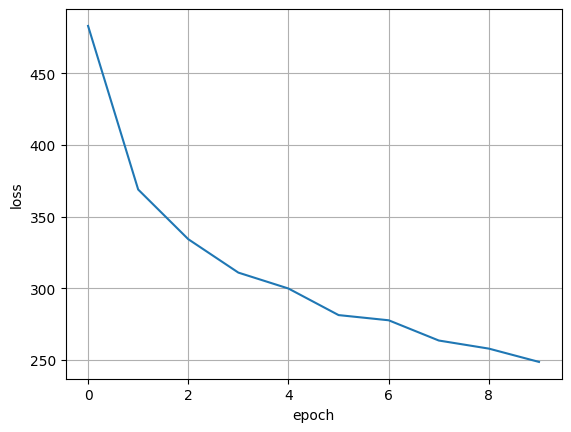

In [17]:
plt.plot(history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()

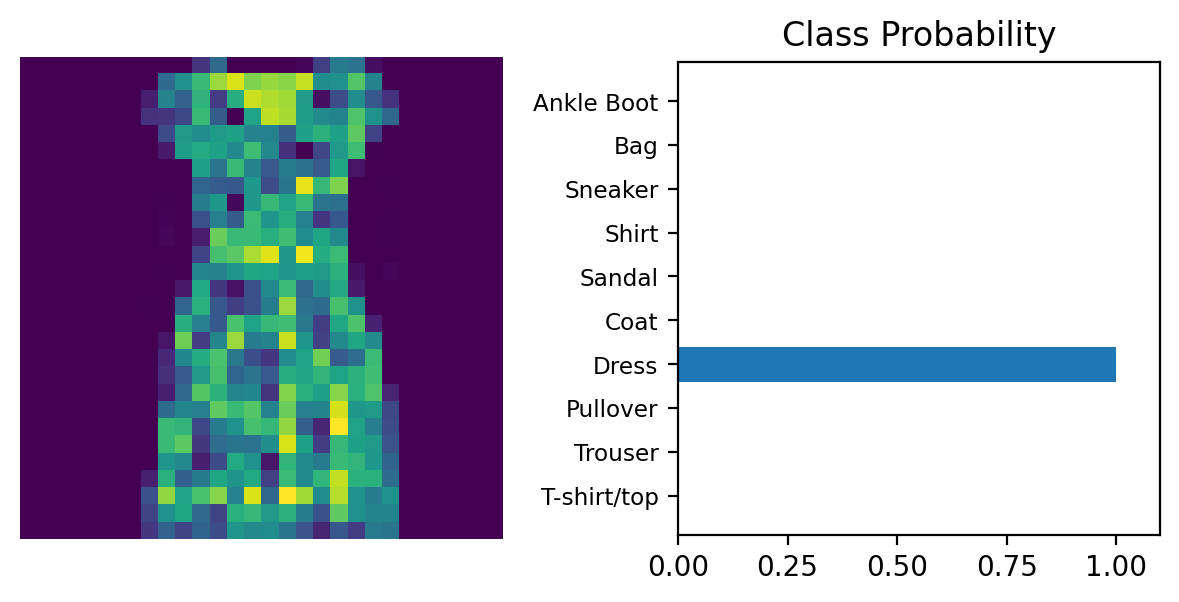

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Проверьте вашу сеть

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[1].flatten()

# TODO: Вычислите вероятности классов (softmax) для img
with torch.no_grad():
    logps = model.forward(img)
ps = torch.softmax(logps,dim=0)

# Постройте изображение и вероятности
helper.view_classify(img, ps, version='Fashion')